# 一起来打怪之 Credit Scoring 练习

--------
## 操作题

### 信用卡欺诈项目

 #### 前期数据导入, 预览及处理(此部分勿修改, 涉及的数据文件无需复制移动)

In [1]:
import pandas as pd
pd.set_option('display.max_columns', 500)
import zipfile
with zipfile.ZipFile('KaggleCredit2.csv.zip', 'r') as z:
    f = z.open('KaggleCredit2.csv')
    data = pd.read_csv(f, index_col=0)
data.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45.0,2.0,0.802982,9120.0,13.0,0.0,6.0,0.0,2.0
1,0,0.957151,40.0,0.0,0.121876,2600.0,4.0,0.0,0.0,0.0,1.0
2,0,0.658180,38.0,1.0,0.085113,3042.0,2.0,1.0,0.0,0.0,0.0
3,0,0.233810,30.0,0.0,0.036050,3300.0,5.0,0.0,0.0,0.0,0.0
4,0,0.907239,49.0,1.0,0.024926,63588.0,7.0,0.0,1.0,0.0,0.0


In [2]:
# 检查数据维度
data.shape

(112915, 11)

In [3]:
# 查看数据缺失值情况
data.isnull().sum(axis=0)

SeriousDlqin2yrs                           0
RevolvingUtilizationOfUnsecuredLines       0
age                                     4267
NumberOfTime30-59DaysPastDueNotWorse       0
DebtRatio                                  0
MonthlyIncome                              0
NumberOfOpenCreditLinesAndLoans            0
NumberOfTimes90DaysLate                    0
NumberRealEstateLoansOrLines               0
NumberOfTime60-89DaysPastDueNotWorse       0
NumberOfDependents                      4267
dtype: int64

In [4]:
# 清除缺失值
data.dropna(inplace=True)
data.shapey = data['SeriousDlqin2yrs']
X = data.drop('SeriousDlqin2yrs', axis=1)

C:\Users\86151\AppData\Local\Temp\ipykernel_3856\2980780030.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  data.shapey = data['SeriousDlqin2yrs']


In [5]:
# 取出对应的X和y
y = data['SeriousDlqin2yrs']
X = data.drop('SeriousDlqin2yrs', axis=1)
# 查看平均的欺诈率
y.mean()

0.06742876076872101

### 以下为操作题

#### 1.把数据切分成训练集和测试集

In [6]:
## 将数据分割为训练集和测试集
# 导入相应的包
from sklearn.model_selection import train_test_split

# 使用 train_tset_split 进行数据分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)
# shuffle=True 表示将数据随机打乱
# test_size=0.3 表示 70% 的数据作为训练集, 30% 的数作为测试集

X_train.shape, X_test.shape, y_train.shape, y_test.shape  #检查数据维度

((76053, 10), (32595, 10), (76053,), (32595,))

SeriousDlqin2yrs
0    101322
1      7326
Name: count, dtype: int64


<Axes: xlabel='SeriousDlqin2yrs'>

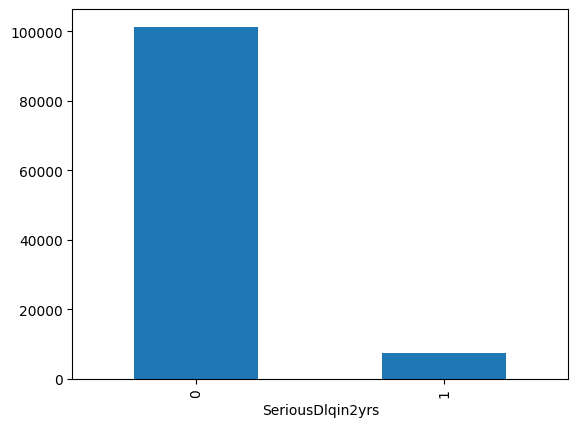

In [7]:
# 通过SeriousDlqin2yrs字段查看正负样本分布情况
data_distribution = data['SeriousDlqin2yrs'].value_counts()
print(data_distribution)

# 绘制两种类别的柱状图
data_distribution.plot(kind='bar')

#### 2.数据预处理之离散化

In [8]:
## 导入相应的包
import pandas as pd 
import numpy as np 

In [9]:
## 对年龄按照3岁一个区间进行离散化
## 先计算出分桶边界
max_age = np.max(data.age)
min_age = np.min(data.age)

print("Max age: ", max_age)
print("Min age: ", min_age)

Max age:  103.0
Min age:  0.0


In [10]:
## 基于pandas的cut函数进行离散化(分箱、分桶)
data.age = pd.cut(data.age, 34) # data.age 按照 34 个等宽的区间进行分箱
# 最大年龄和最小年龄之间有 34 个 3 岁区间

data.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,"(42.412, 45.441]",2.0,0.802982,9120.0,13.0,0.0,6.0,0.0,2.0
1,0,0.957151,"(39.382, 42.412]",0.0,0.121876,2600.0,4.0,0.0,0.0,0.0,1.0
2,0,0.658180,"(36.353, 39.382]",1.0,0.085113,3042.0,2.0,1.0,0.0,0.0,0.0
3,0,0.233810,"(27.265, 30.294]",0.0,0.036050,3300.0,5.0,0.0,0.0,0.0,0.0
4,0,0.907239,"(48.471, 51.5]",1.0,0.024926,63588.0,7.0,0.0,1.0,0.0,0.0


#### 3.数据预处理之独热向量编码

In [11]:
## 对上述分箱后的年龄段进行独热向量编码
## 使用 pandas 的 get_dummies 完成
age = pd.get_dummies(data, columns=['age'], prefix_sep='_', 
                     dummy_na=False, drop_first=False)
    # pandas 库中的 get_dummies 函数将 data 这个 DataFrame 中的 age 这一列进行独热编码。
    # 也就是将 age 的不同取值转换为不同的列, 每个列的值为 0 或 1, 表示该样本是否属于该取值。
    # 参数 prefix_sep 表示新列名的分隔符, 默认为下划线, 例如 age_20 表示 age 为 20 的列。
    # 参数 dummy_na 表示是否将缺失值也作为一个取值进行编码, 默认为 False，表示忽略缺失值。
    # 参数 drop_first 表示是否去掉第一个取值的列，以避免多重共线性, 默认为 False, 表示保留所有取值的列。

data

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,"(42.412, 45.441]",2.0,0.802982,9120.0,13.0,0.0,6.0,0.0,2.0
1,0,0.957151,"(39.382, 42.412]",0.0,0.121876,2600.0,4.0,0.0,0.0,0.0,1.0
2,0,0.658180,"(36.353, 39.382]",1.0,0.085113,3042.0,2.0,1.0,0.0,0.0,0.0
3,0,0.233810,"(27.265, 30.294]",0.0,0.036050,3300.0,5.0,0.0,0.0,0.0,0.0
4,0,0.907239,"(48.471, 51.5]",1.0,0.024926,63588.0,7.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
112910,0,0.385742,"(48.471, 51.5]",0.0,0.404293,3400.0,7.0,0.0,0.0,0.0,0.0
112911,0,0.040674,"(72.706, 75.735]",0.0,0.225131,2100.0,4.0,0.0,1.0,0.0,0.0
112912,0,0.299745,"(42.412, 45.441]",0.0,0.716562,5584.0,4.0,0.0,1.0,0.0,2.0
112913,0,0.000000,"(27.265, 30.294]",0.0,0.000000,5716.0,4.0,0.0,0.0,0.0,0.0


#### 4.数据预处理之幅度缩放

In [12]:
## 对连续值特征进行幅度缩放
## 使用 StandardScaler 等幅度缩放器进行处理
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

## 对 X_train 和 X_test 进行标准化
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.fit_transform(X_test)

## 查看 X_train 和 X_test 的数据维度
X_train_std.shape, X_test_std.shape

((76053, 10), (32595, 10))

#### 5.使用 logistic Regression 建模，并且输出一下系数，分析重要度。   

In [13]:
## fit建模, 建完模之后可以取出 coefficients 属性
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

## 创建 LogisticRegression 模型对象
LR_Model = LogisticRegression()

## Logistic Regression 模型拟合
LR_Model.fit(X_train_std, y_train)

## 预测
LR_Predict = LR_Model.predict(X_test_std)

## 模型均方误差
LR_MSE = mean_squared_error(y_test, LR_Predict)

## 模型系数
LR_Coefficients = LR_Model.coef_

## 模型截距
LR_Intercept = LR_Model.intercept_

# 准确度计算
LR_Accuracy = accuracy_score(y_test, LR_Predict)

## 输出相关指标
print("Logistic Regression model MSE: \n", LR_MSE)
print("Logistic Regression model cofficients: \n", LR_Coefficients)
print("Logistic Regression model intercept: \n", LR_Intercept)
print("Logistic Regression model accuracy: \n", LR_Accuracy)

Logistic Regression model MSE: 
 0.067310937260316
Logistic Regression model cofficients: 
 [[-0.04640223 -0.35530961  1.68622272  0.32790763 -0.02227188 -0.12312072
   1.59923832 -0.20833262 -3.12238529  0.11637645]]
Logistic Regression model intercept: 
 [-2.86538565]
Logistic Regression model accuracy: 
 0.932689062739684


#### 6.使用网格搜索交叉验证进行调参
调整 penalty 和 C 参数，其中 penalty 候选为 "l1" 和 "l2", C的候选为 [1,10,100,500]

In [14]:
## 导入相应的包
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

## 定义网格参数
param_grid = {'penalty': ['l1', 'l2'], 'C': [1, 10, 100, 500]} 

## 创建网格搜索交叉验证对象，使用 5 折交叉验证, 评分标准为准确率
LR_grid = GridSearchCV(LR_Model, param_grid, cv=5, scoring='accuracy')

## 使用所有数据拟合网格搜索交叉验证对象
LR_grid.fit(X, y)  # 这里没有切分数据集

# 输出最好的超参数
print("Logistic Regression best parameters: ", LR_grid.best_params_)

# 输出最优评分
print("Logistic Regression best score: ", LR_grid.best_score_)

# 输出最好的模型
print("Logistic Regression beat model: ", LR_grid.best_estimator_)

Logistic Regression best parameters:  {'C': 10, 'penalty': 'l2'}
Logistic Regression best score:  0.9328105487677275
Logistic Regression beat model:  LogisticRegression(C=10)


#### 7.在测试集上进行预测，计算 查准率/查全率/auc/混淆矩阵/f1值 等测试指标

Logistic Regression best accuracy:  0.932689062739684
Logistic Regression best precision:  0.7546910927128105
Logistic Regression best recall:  0.5204626796753633
Logistic Regression best AUC:  0.5204626796753634
Logistic Regression best confusion matrix: 
 [[30305    71]
 [ 2123    96]]
Logistic Regression best F1 score:  0.5227676621149431


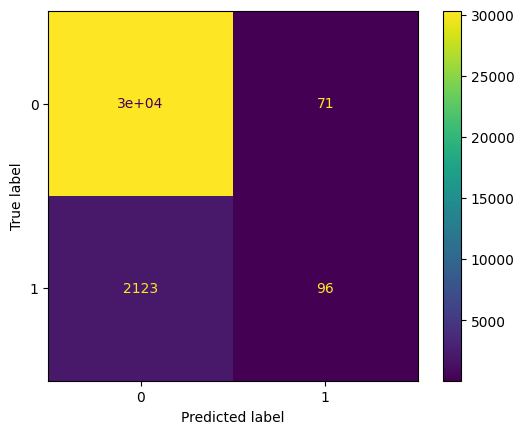

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# 创建逻辑回归模型对象, 参数设置为上一步得到的最优参数
LR_Best_Model = LogisticRegression(penalty=LR_grid.best_params_.get('penalty'), C=LR_grid.best_params_.get('C'))

# 使用测试数据, 拟合上一步得出的最优模型
LR_Best_Model.fit(X_train_std, y_train)

# 使用模型预测测试数据集的标签
LR_Best_Predict = LR_Best_Model.predict(X_test_std)

# 计算并打印准确率
LR_Best_Accuracy = accuracy_score(y_test, LR_Best_Predict)
print("Logistic Regression best accuracy: ", LR_Best_Accuracy)

# 计算并打印查准率
LR_Best_Precision = precision_score(y_test, LR_Best_Predict, average="macro")
print("Logistic Regression best precision: ", LR_Best_Precision)

# 计算并打印查全率
LR_Best_Recall = recall_score(y_test, LR_Best_Predict, average="macro")
print("Logistic Regression best recall: ", LR_Best_Recall)

# 计算并打印AUC
LR_Best_Auc = roc_auc_score(y_test, LR_Best_Predict, multi_class="ovo")
print("Logistic Regression best AUC: ", LR_Best_Auc)

# 计算并打印混淆矩阵
LR_Best_cm = confusion_matrix(y_test, LR_Best_Predict)
print("Logistic Regression best confusion matrix: \n", LR_Best_cm)

# 计算并打印F1值
LR_Best_F1Score = f1_score(y_test, LR_Best_Predict, average="macro")
print("Logistic Regression best F1 score: ", LR_Best_F1Score)

# 绘制并显示混淆矩阵
LR_Best_CM_Display = ConfusionMatrixDisplay(LR_Best_cm).plot()

#### 8.更多优化
银行通常会有更严格的要求，因为欺诈带来的后果通常比较严重，一般我们会调整模型的标准。   

比如在Logistic Regression当中，一般我们的概率判定边界为0.5，但是我们可以把阈值设定低一些，来提高模型的“敏感度”   
试试看把阈值设定为0.3，再看看这个时候的混淆矩阵等评估指标。

In [16]:
## 定义 NewPredict, 用于计算调整模型阈值后的评价指标
def NewPredict(Model, Model_Name, threshold):
    # 计算模型的预测概率
    Predict_Pro = Model.decision_function(X_test_std)
    
    # 根据阈值将概率转换为类别
    New_Predict = [1 if prob >= threshold else 0 for prob in Predict_Pro]

    # 计算并打印评估指标
    print(Model_Name + f" best model accuracy with default threshold: {accuracy_score(y_test, LR_Predict) * 100:.2f}%")
    print(Model_Name + f" best model recall with default threshold: {recall_score(y_test, LR_Predict) * 100:.2f}%")
    print(Model_Name + f" best model accuracy with custom threshold: {accuracy_score(y_test, New_Predict) * 100:.2f}%")
    print(Model_Name + f" best model recall with custom threshold: {recall_score(y_test, New_Predict) * 100:.2f}%")
    
    # 计算混淆矩阵
    cm = confusion_matrix(y_test, New_Predict)
    print(Model_Name + ' best model confusion Matrix: \n', cm)
    ConfusionMatrixDisplay(cm).plot()

Logistic Regression best model accuracy with default threshold: 93.27%
Logistic Regression best model recall with default threshold: 4.15%
Logistic Regression best model accuracy with custom threshold: 93.25%
Logistic Regression best model recall with custom threshold: 3.47%
Logistic Regression best model confusion Matrix: 
 [[30317    59]
 [ 2142    77]]
Logistic Regression best model accuracy with default threshold: 93.27%
Logistic Regression best model recall with default threshold: 4.15%
Logistic Regression best model accuracy with custom threshold: 93.26%
Logistic Regression best model recall with custom threshold: 3.15%
Logistic Regression best model confusion Matrix: 
 [[30328    48]
 [ 2149    70]]
Logistic Regression best model accuracy with default threshold: 93.27%
Logistic Regression best model recall with default threshold: 4.15%
Logistic Regression best model accuracy with custom threshold: 93.26%
Logistic Regression best model recall with custom threshold: 2.88%
Logistic

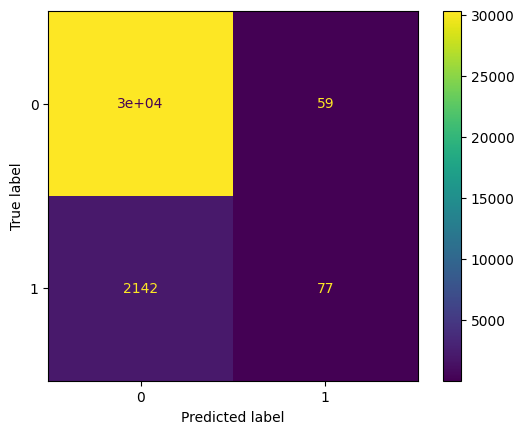

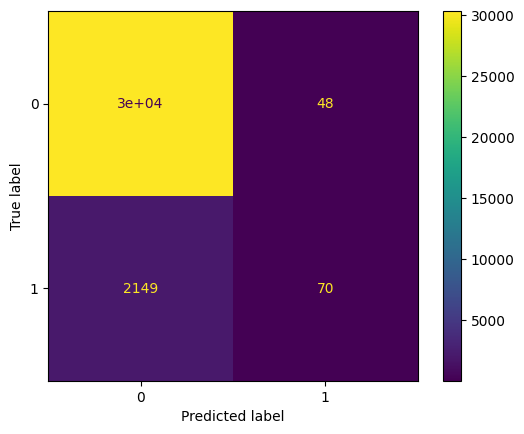

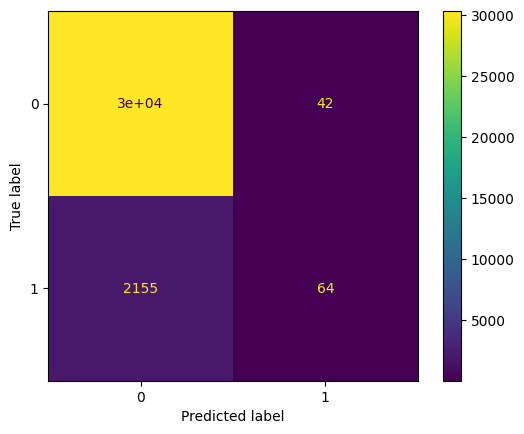

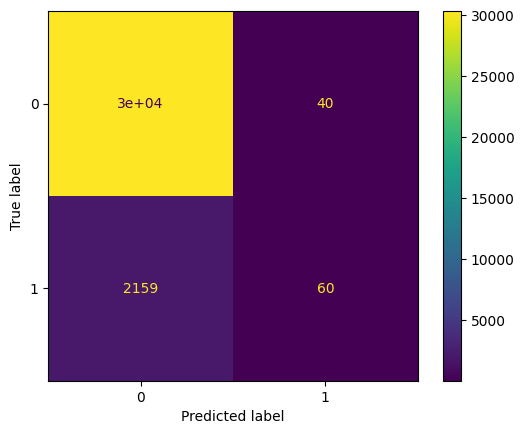

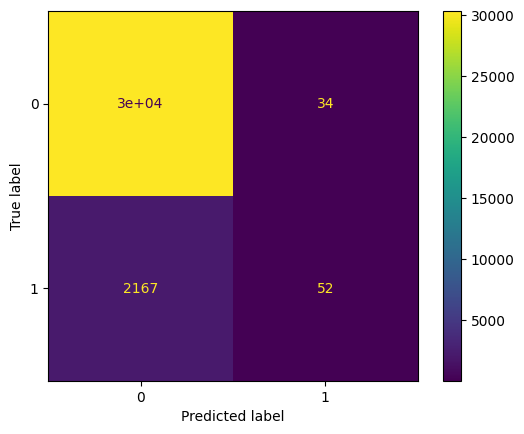

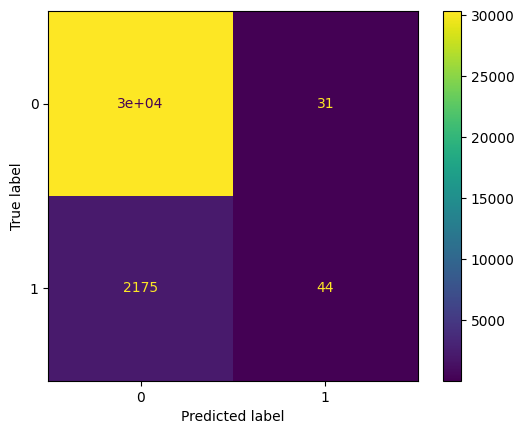

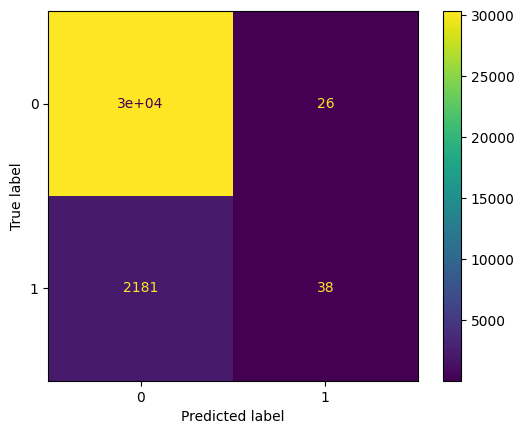

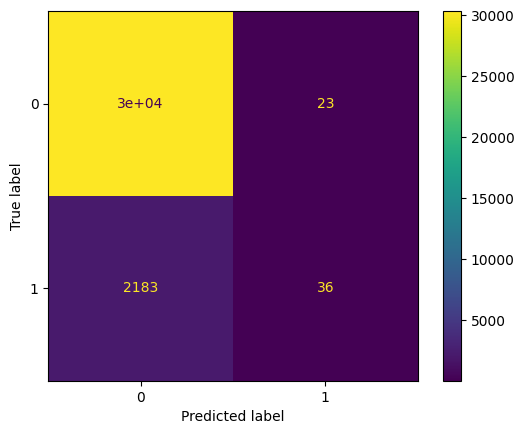

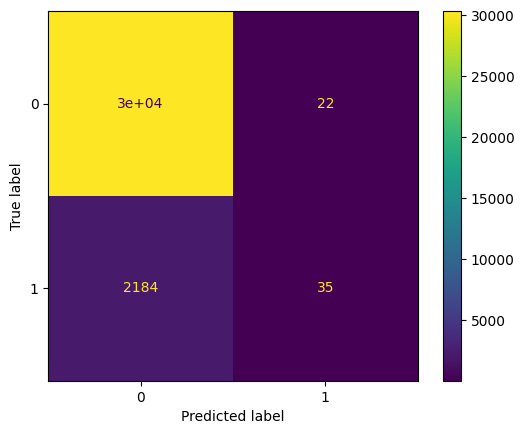

In [17]:
## 循环 thresholds 对调整后的模型进行评估
thresholds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
for i in range(0, len(thresholds)):
    NewPredict(LR_Best_Model, "Logistic Regression", thresholds[i])


#### 9.尝试对不同特征的重要度进行排序，通过特征选择的方式，对特征进行筛选。并重新建模，观察此时的模型准确率等评估指标。

In [18]:
## 导入包, 其它需要使用的包之前的代码块已经导入, 此处不再重复
from sklearn.feature_selection import VarianceThreshold, SelectKBest, chi2

## 使用方差分析来移除方差为零的特征
vt = VarianceThreshold()
X_train = vt.fit_transform(X_train)
X_test = vt.transform(X_test)

## 使用卡方检验来选择最优的 k 个特征
k = 5 # 选择 5 个特征
skb = SelectKBest(chi2, k=k)
X_train = skb.fit_transform(X_train, y_train) # 输入的 X 不能是负数, 所以使用 X_train
X_test = skb.transform(X_test)

## 重新建模，观察模型的准确率
LR_New_Model = LogisticRegression()
LR_New_Model.fit(X_train, y_train)
LR_New_pred = LR_New_Model.predict(X_test)
LR_New_Acc = accuracy_score(y_test, LR_New_pred)

print(f'Logistic Regression model new accuracy: {LR_New_Acc * 100:.2f}%')

Logistic Regression model new accuracy: 93.20%


#### 10.其他模型算法尝试
使用RandomForestClassifier/SVM/KNN等sklearn分类算法进行分类，尝试上述超参数调优算法过程。

- 创建通用函数, 避免重复造轮子

In [19]:
## FitOptimeFun 函数定义

def FitOptimeFun(Model, Model_Name, param_grid):
    ## 函数说明：
    # FitOptimeFun 使用五折交叉验证得到最优的参数
    # Model: 模型对象
    # Model_Name: 模型的名称
    # param_grid: 参数字典

    ## 创建网格搜索交叉验证对象，使用 5 折交叉验证, 评分标准为准确率
    grid = GridSearchCV(Model, param_grid, cv=5, scoring='accuracy')

    ## 使用所有数据拟合网格搜索交叉验证对象
    grid.fit(X, y)  # 这里没有切分数据集

    # 输出最好的超参数
    print(Model_Name + " best parameters: ", grid.best_params_)

    # 输出最优评分
    print(Model_Name + " best score: ", grid.best_score_)

    # 输出最好的模型
    print(Model_Name + " beat model: ", grid.best_estimator_)
    
    return grid

In [20]:
## ModelEvaFun 函数
def ModelEvaFun(Best_Model, Model_Name):
    ## 函数说明: 
    # ModelEvaFun 用于评估上一步得到的最优参数的模型
    # Best_Model: 最优参数模型
    # Model_Name: 模型的名称
    
    # 使用测试数据, 拟合上一步得出的最优模型
    Best_Model.fit(X_train_std, y_train)

    # 使用模型预测测试数据集的标签
    Best_Predict = Best_Model.predict(X_test_std)

    # 计算并打印准确率
    Best_Accuracy = accuracy_score(y_test, Best_Predict)
    print(Model_Name + " best accuracy: ", Best_Accuracy)

    # 计算并打印查准率
    Best_Precision = precision_score(y_test, Best_Predict, average="macro")
    print(Model_Name + " best precision: ", Best_Precision)

    # 计算并打印查全率
    Best_Recall = recall_score(y_test, Best_Predict, average="macro")
    print(Model_Name + " best recall: ", Best_Recall)

    # 计算并打印AUC
    Best_Auc = roc_auc_score(y_test, Best_Predict, multi_class="ovo")
    print(Model_Name + " best AUC: ", Best_Auc)

    # 计算并打印混淆矩阵
    Best_cm = confusion_matrix(y_test, Best_Predict)
    print(Model_Name + " best confusion matrix: \n", Best_cm)

    # 计算并打印F1值
    Best_F1Score = f1_score(y_test, Best_Predict, average="macro")
    print(Model_Name + " best F1 score: ", Best_F1Score)

    # 绘制并显示混淆矩阵
    ConfusionMatrixDisplay(Best_cm).plot()

Random Forest best parameters:  {'criterion': 'entropy', 'n_estimators': 10}
Random Forest best score:  0.9326540936415071
Random Forest beat model:  RandomForestClassifier(criterion='entropy', n_estimators=10)
Random Forest best accuracy:  0.9326277036355269
Random Forest best precision:  0.7352846913256526
Random Forest best recall:  0.5383922659346703
Random Forest best AUC:  0.5383922659346703
Random Forest best confusion matrix: 
 [[30217   159]
 [ 2037   182]]
Random Forest best F1 score:  0.5535622155915695


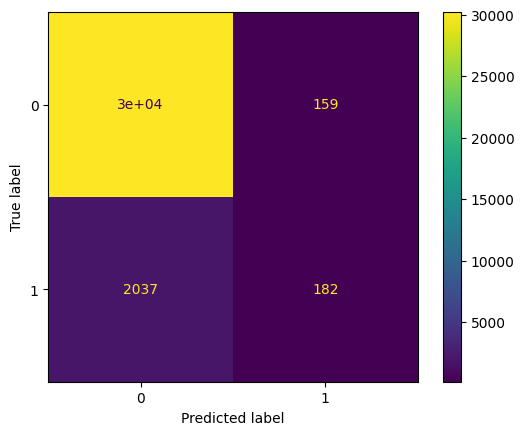

In [21]:
# 随机森林
from sklearn.ensemble import RandomForestClassifier
DF_Model = RandomForestClassifier()
DF_Grid_Param = {'criterion': ['entropy', 'gini', 'log_loss'], 'n_estimators': [10, 15]}
DF_grid = FitOptimeFun(DF_Model, "Random Forest", DF_Grid_Param)
DF_Best_Model = RandomForestClassifier(criterion=DF_grid.best_params_.get('criterion'), 
                                       n_estimators=DF_grid.best_params_.get('n_estimators'))
ModelEvaFun(DF_Best_Model, "Random Forest")

In [23]:
## SVM 的调参时间过长, 这个单元格没有运行 !!!
# 支持向量机
# 这个单元格代码不要轻易运行, 时间巨长
'''
from sklearn.svm import SVC
SVM_Model = SVC()
SVM_Grid_Param = {'gamma': [9, 10], 'C':[1.0, 1.2]}
SVM_grid = FitOptimeFun(SVM_Model, "SVM", SVM_Grid_Param)
SVM_Best_Model = SVC(gamma=SVM_grid.best_params_.get('gamma'), C=SVM_grid.best_params_.get('C'))
ModelEvaFun(SVM_Best_Model, "SVM")
'''

'\nfrom sklearn.svm import SVC\nSVM_Model = SVC()\nSVM_Grid_Param = {\'gamma\': [9, 10], \'C\':[1.0, 1.2]}\nSVM_grid = FitOptimeFun(SVM_Model, "SVM", SVM_Grid_Param)\nSVM_Best_Model = SVC(gamma=SVM_grid.best_params_.get(\'gamma\'), C=SVM_grid.best_params_.get(\'C\'))\nModelEvaFun(SVM_Best_Model, "SVM")\n'

KNN best parameters:  {'metric': 'l2', 'n_neighbors': 6}
KNN best score:  0.9325988526576072
KNN beat model:  KNeighborsClassifier(metric='l2', n_neighbors=6)
KNN best accuracy:  0.9327811013959196
KNN best precision:  0.7446450616591703
KNN best recall:  0.5307465124206239
KNN best AUC:  0.5307465124206239
KNN best confusion matrix: 
 [[30259   117]
 [ 2074   145]]
KNN best F1 score:  0.540974594016858


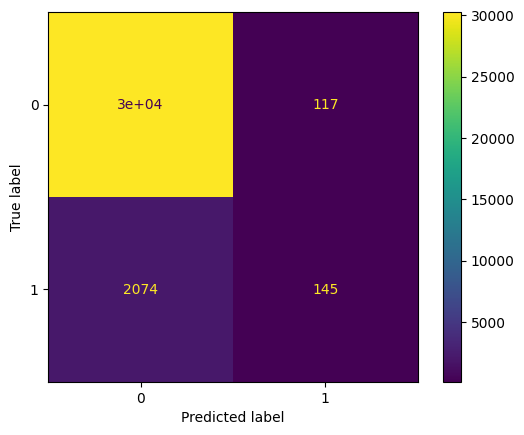

In [24]:
# K最近邻
from sklearn.neighbors import KNeighborsClassifier
KNN_Model = KNeighborsClassifier()
KNN_Grid_Param = {'metric': ['l1', 'l2'], 'n_neighbors': [4, 5, 6]}
KNN_grid = FitOptimeFun(KNN_Model, "KNN", KNN_Grid_Param)
KNN_Best_Model = KNeighborsClassifier(metric=KNN_grid.best_params_.get('metric'), 
                                      n_neighbors=KNN_grid.best_params_.get('n_neighbors'))
ModelEvaFun(KNN_Best_Model, "KNN")